In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from prophet import Prophet

In [2]:
df = pd.read_csv("ai_news_with_sentiment_scores.csv")
df['publishedAt'] = pd.to_datetime(df['publishedAt'], errors='coerce')

# --- Aggregate hourly sentiment counts ---
batch = df.groupby([df['publishedAt'].dt.floor('15min'), 'sentiment']) \
           .size().unstack(fill_value=0).sort_index()

<Figure size 1000x1000 with 0 Axes>

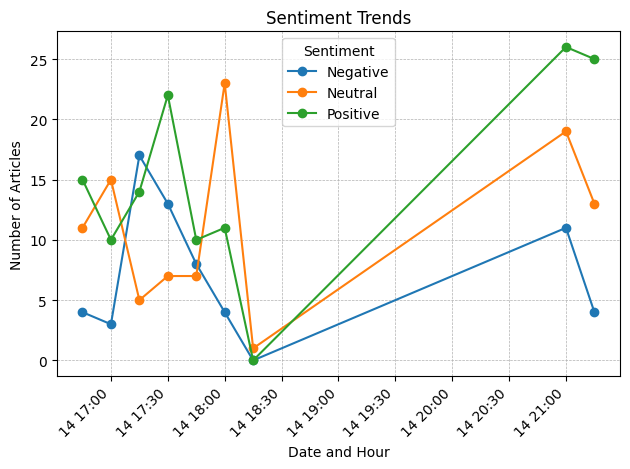

In [4]:
#  Line Chart for Sentiment Trends Over Time 

plt.figure(figsize=(10, 10)) 
batch.plot(kind='line', marker='o')

plt.title('Sentiment Trends')
plt.xlabel('Date and Hour')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha="right") 
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

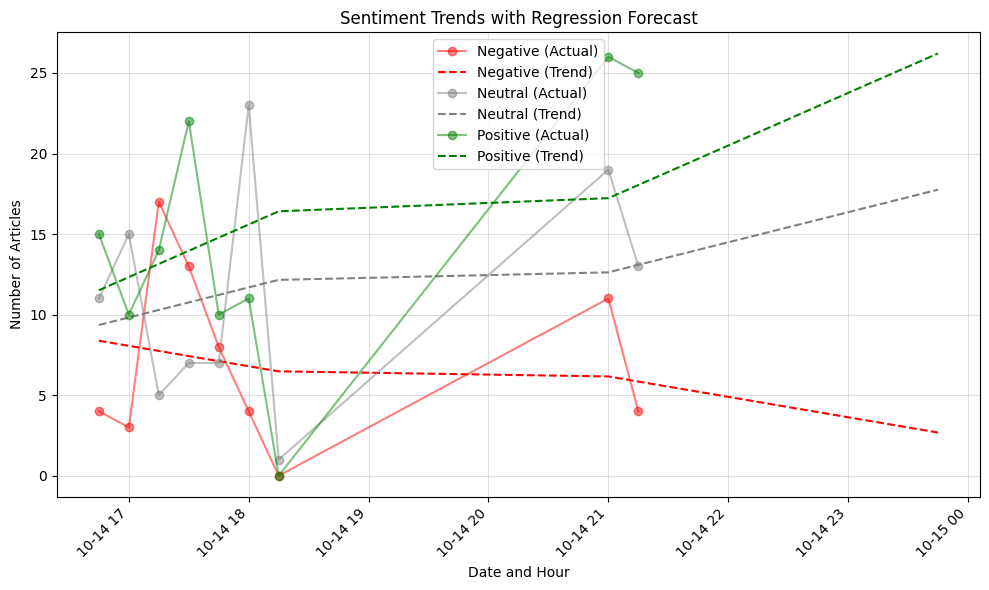

In [4]:
# Forecast using  Regression

x = np.arange(len(batch)).reshape(-1, 1)
future_steps = 10
x_future = np.arange(len(batch) + future_steps).reshape(-1, 1)
future_index = batch.index.append(pd.date_range(batch.index[-1], periods=future_steps+1, freq='15min')[1:])

colors = {'Negative': 'red', 'Neutral': 'gray', 'Positive': 'green'}

plt.figure(figsize=(10,6))

for sentiment in ['Negative', 'Neutral', 'Positive']:
    y = batch[sentiment].values
    plt.plot(batch.index, y, marker='o', color=colors[sentiment], alpha=0.5, label=f"{sentiment} (Actual)")
    
    model = LinearRegression().fit(x, y)
    y_pred = model.predict(x_future)
    plt.plot(future_index, y_pred, linestyle='--', color=colors[sentiment], label=f"{sentiment} (Trend)")

plt.title("Sentiment Trends with Regression Forecast")
plt.xlabel("Date and Hour")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

19:48:42 - cmdstanpy - INFO - Chain [1] start processing
19:48:43 - cmdstanpy - INFO - Chain [1] done processing
19:48:43 - cmdstanpy - INFO - Chain [1] start processing
19:48:43 - cmdstanpy - INFO - Chain [1] done processing
19:48:43 - cmdstanpy - INFO - Chain [1] start processing
19:48:43 - cmdstanpy - INFO - Chain [1] done processing


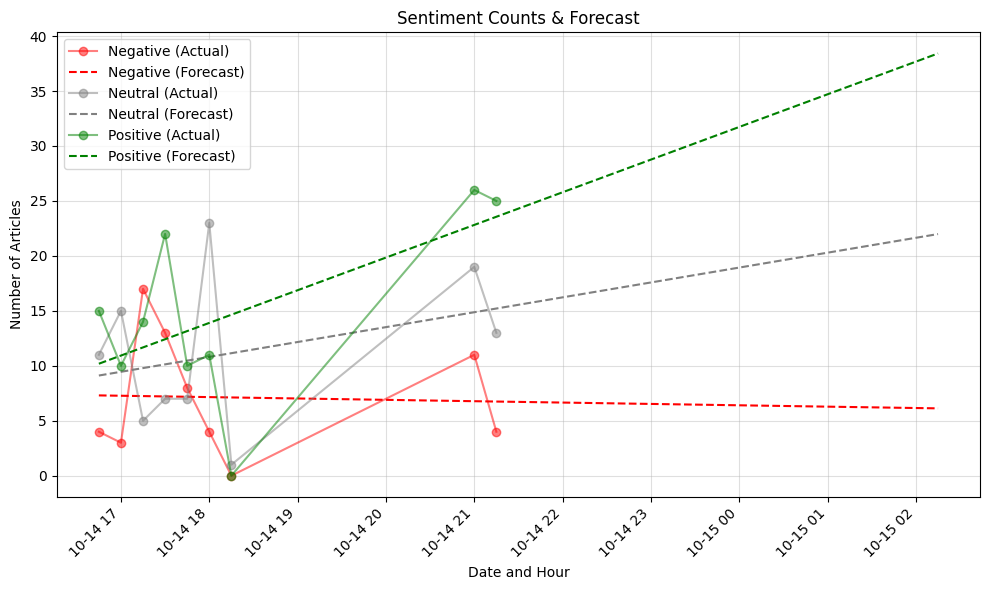

In [5]:
#  Forecast using Prophet

future_steps = 5
colors = {'Negative': 'red', 'Neutral': 'gray', 'Positive': 'green'}

plt.figure(figsize=(10,6))

for col in ['Negative', 'Neutral', 'Positive']:
    df_prophet = batch[[col]].reset_index()
    df_prophet.columns = ['ds', 'y']
    
    model = Prophet()
    model.fit(df_prophet)
    
    future = model.make_future_dataframe(periods=future_steps, freq='h')
    forecast = model.predict(future)
    
    # Plot actual
    plt.plot(df_prophet['ds'], df_prophet['y'], marker='o', alpha=0.5, color=colors[col], label=f"{col} (Actual)")
    # Plot forecast
    plt.plot(forecast['ds'], forecast['yhat'], linestyle='--', color=colors[col], label=f"{col} (Forecast)")

plt.title("Sentiment Counts & Forecast")
plt.xlabel("Date and Hour")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
df

,source,title,description,url,publishedAt,full_text,processed_text,sentiment_score,sentiment
0,"{'id': 'cbc-news', 'name': 'CBC News'}",Pragmatism and positivity: How Canada and Indi...,After two years of navigating a bitter diploma...,https://www.cbc.ca/news/world/anand-canada-ind...,2025-10-14 21:29:38,Pragmatism and positivity: How Canada and Indi...,pragmatism positivity canada india framing res...,0.00,Neutral
1,"{'id': None, 'name': 'pymnts.com'}",Salesforce Collaborates on AI Projects With Op...,Salesforce partnered with OpenAI to support sa...,http://www.pymnts.com/news/artificial-intellig...,2025-10-14 21:29:34,Salesforce Collaborates on AI Projects With Op...,salesforce collaborates ai project openai stri...,0.20,Positive
2,"{'id': None, 'name': 'Dailyreckoning.com'}",Looking for Taylor Swift Returns,This post Looking for Taylor Swift Returns app...,https://dailyreckoning.com/looking-for-taylor-...,2025-10-14 21:29:28,Looking for Taylor Swift Returns This post Loo...,looking taylor swift return post looking taylo...,0.00,Neutral
3,"{'id': None, 'name': 'Github.com'}",Show HN: Infinity Arcade–Open-source local LLM...,"Hi HN! We're Jeremy, Victoria, Krishna, and Da...",https://github.com/lemonade-sdk/infinity-arcade,2025-10-14 21:27:03,Show HN: Infinity Arcade–Open-source local LLM...,show hn infinity arcadeopensource local llm sh...,0.00,Neutral
4,"{'id': None, 'name': 'Techpowerup.com'}",(PR) Supermicro Introduces Data Center Buildin...,"Super Micro Computer, Inc. (SMCI), a total IT ...",https://www.techpowerup.com/341891/supermicro-...,2025-10-14 21:25:07,(PR) Supermicro Introduces Data Center Buildin...,pr supermicro introduces data center building ...,0.10,Positive
...,...,...,...,...,...,...,...,...,...
293,thepilotnews,Instagram says it's safeguarding teens by limi...,Teenagers on Instagram will be restricted to s...,https://www.thepilotnews.com/business/instagra...,2025-10-14 16:48:00,Instagram says it's safeguarding teens by limi...,instagram say safeguarding teen limiting pg co...,0.35,Positive
294,dailygazette,Trump to welcome Argentina's President Milei a...,Argentina’s libertarian leader is sparing no p...,https://www.dailygazette.com/ap/business/trump...,2025-10-14 16:47:55,Trump to welcome Argentina's President Milei a...,trump welcome argentina president milei u exte...,0.00,Neutral
295,winchesterstar,Trump to welcome Argentina's President Milei a...,Argentina’s libertarian leader is sparing no p...,https://www.winchesterstar.com/associated_pres...,2025-10-14 16:47:55,Trump to welcome Argentina's President Milei a...,trump welcome argentina president milei u exte...,0.00,Neutral
296,dnronline,Trump to welcome Argentina's President Milei a...,Argentina’s libertarian leader is sparing no p...,https://www.dnronline.com/associated_press/nat...,2025-10-14 16:47:55,Trump to welcome Argentina's President Milei a...,trump welcome argentina president milei u exte...,0.00,Neutral


In [90]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'], errors='coerce')

# format with full date + time (YYYY-MM-DD HH:MM:SS)
df['publishedAt'] = df['publishedAt'].dt.strftime('%Y-%m-%d %H:%M:%S')

date_list = df['publishedAt'].dropna().tolist()

# create comma-separated string
date_string = ', '.join(date_list)


print(date_string)


2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00:00:00, 2025-10-14 00

In [91]:
# Make sure it's numeric
df['sentiment_score'] = pd.to_numeric(df['sentiment_score'], errors='coerce')

# Drop NaN if any
score_list = df['sentiment_score'].dropna().astype(str).tolist()

# Create comma-separated string
score_string = ', '.join(score_list)

print(score_string)


0.0, 0.2, 0.0, 0.0, 0.1, 0.5, 0.4, 0.0, 0.0, 0.3, 0.0, 0.5, 0.3, -0.4, -0.5, -0.6, 0.2, 0.4, -0.7, 0.5, 0.85, 0.0, 0.8, 0.75, 0.7, 0.7, 0.0, 0.0, 0.7, 0.0, 0.45, 0.6, 0.0, 0.55, 0.7, 0.65, 0.0, 0.65, 0.5, 0.0, 0.65, 0.45, 0.0, 0.0, -0.7, -0.6, -0.5, -0.75, 0.55, -0.3, 0.45, -0.7, 0.0, -0.55, 0.0, 0.6, 0.5, -0.3, 0.75, -0.85, 0.0, 0.2, 0.4, 0.0, 0.6, 0.8, 0.6, 0.8, 0.5, 0.0, 0.0, 0.5, 0.0, 0.0, 0.4, 0.6, 0.7, 0.0, 0.5, 0.0, -0.85, 0.0, 0.6, 0.0, 0.7, 0.75, 0.55, 0.0, 0.8, 0.0, 0.0, 0.2, 0.35, 0.0, 0.0, 0.25, -0.3, 0.4, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.3, 0.4, -0.6, -0.3, 0.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.4, 0.2, 0.3, 0.5, 0.0, 0.85, 0.0, 0.7, 0.65, 0.0, 0.75, 0.7, -0.75, -0.8, 0.6, -0.7, 0.6, -0.4, 0.0, 0.0, -0.5, 0.5, 0.1, 0.0, 0.65, -0.8, 0.65, -0.7, 0.0, 0.0, 0.75, 0.7, 0.5, -0.4, 0.05, 0.55, 0.68, 0.72, -0.4, 0.65, 0.35, 0.75, -0.6, 0.5, 0.6, 0.75, 0.8, 0.0, 0.6, -0.65, 0.7, 0.85, 0.1, 0.05, 0.5, 0.5, 0.65, 0.45, 0.3, 0.0, 0.7, -

In [19]:
from dotenv import load_dotenv

load_dotenv()
API_KEY = os.getenv("GEMINI_API_KEY")
genai.configure(api_key=API_KEY)
model = genai.GenerativeModel('models/gemini-2.5-flash-lite')

In [85]:
PROMPT_TEMPLATE = f"""
You are an expert data forecaster.
Below is a time series of daily sentiment scores for AI-related news.

TASK:
1. Predict only the next 7 calendar days (15 Oct to 22 Oct) of sentiment scores beyond the last date in the data. Focus on seasonality and cyclical nature of data.
2. For each day, provide predicted, lower, and upper values as numeric fields. The lower and upper bounds should be approximately +/- 0.05 around predicted but you can adjust slightly for pattern continuity.
3. Output strictly as a JSON array of objects with keys: date (YYYY-MM-DD), predicted (number), lower (number), upper (number).
4. No extra text outside the JSON.

Date (CSV):
{date_string}

score (CSV):
{score_string}

Predict next 7 days:
"""

In [86]:
response = model.generate_content(PROMPT_TEMPLATE)
cleaned_text = response.text.strip().replace("```json", "").replace("```", "")
        
# list of dictionaries, e.g., [{"label": "Positive", "score": 0.8}, ...]
parsed_json = json.loads(cleaned_text)

In [87]:
parsed_json

[{'date': '2025-10-15', 'predicted': 0.1, 'lower': 0.05, 'upper': 0.15},
 {'date': '2025-10-16', 'predicted': 0.2, 'lower': 0.15, 'upper': 0.25},
 {'date': '2025-10-17', 'predicted': 0.25, 'lower': 0.2, 'upper': 0.3},
 {'date': '2025-10-18', 'predicted': 0.3, 'lower': 0.25, 'upper': 0.35},
 {'date': '2025-10-19', 'predicted': 0.25, 'lower': 0.2, 'upper': 0.3},
 {'date': '2025-10-20', 'predicted': 0.15, 'lower': 0.1, 'upper': 0.2},
 {'date': '2025-10-21', 'predicted': 0.1, 'lower': 0.05, 'upper': 0.15}]

In [88]:
forecast_df = pd.DataFrame(parsed_json)
forecast_df

,date,predicted,lower,upper
0,2025-10-15,0.10,0.05,0.15
1,2025-10-16,0.20,0.15,0.25
2,2025-10-17,0.25,0.20,0.30
3,2025-10-18,0.30,0.25,0.35
4,2025-10-19,0.25,0.20,0.30
5,2025-10-20,0.15,0.10,0.20
6,2025-10-21,0.10,0.05,0.15


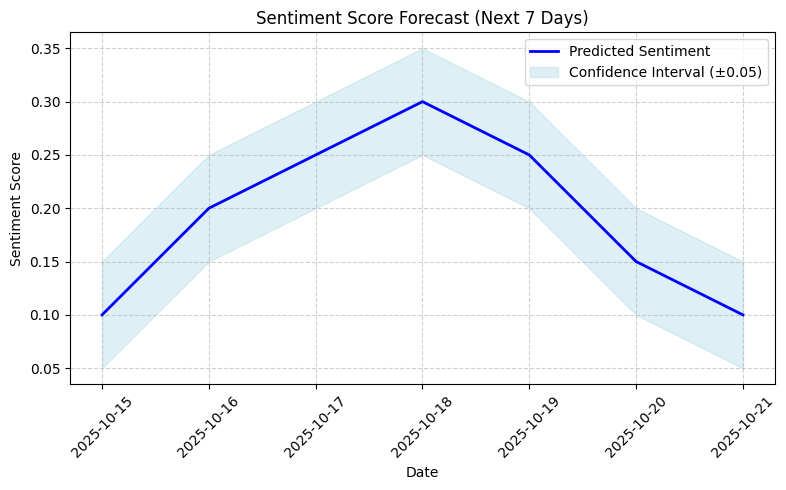

In [89]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(8,5))
plt.plot(forecast_df['date'], forecast_df['predicted'], label='Predicted Sentiment', color='blue', linewidth=2)

# fill confidence interval
plt.fill_between(
    forecast_df['date'],
    forecast_df['lower'],
    forecast_df['upper'],
    color='lightblue',
    alpha=0.4,
    label='Confidence Interval (±0.05)'
)

plt.title('Sentiment Score Forecast (Next 7 Days)')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
